# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_after_zero(arr):
    max_value = None  # Initialize max_value as None
    
    for i in range(len(arr) - 1):
        if arr[i] == 0:
            if max_value is None:
                max_value = arr[i + 1]
            else:
                max_value = max(max_value, arr[i + 1])
    
    return max_value

# Example usage
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
result = max_after_zero(x)
result 


5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def find_nearest_element(matrix, target):
    # Разница между каждым элементом матрицы и целевым числом
    differences = np.abs(matrix - target)
    
    # Находим индекс элемента с минимальной разницей
    nearest_index = np.unravel_index(np.argmin(differences), differences.shape)
    
    # Возвращаем ближайший элемент и его индексы
    nearest_element = matrix[nearest_index]
    return nearest_element

# Пример использования
X = np.arange(0, 10).reshape((2, 5))
v = 3.6
nearest_element = find_nearest_element(X, v)
nearest_element


4

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
import numpy as np

def scale(X):
    # Calculate the mean and standard deviation of each column
    column_means = np.mean(X, axis=0)
    column_stddevs = np.std(X, axis=0)

    # Avoid division by zero by setting the standard deviation to 1 where it's zero
    column_stddevs[column_stddevs == 0] = 1

    # Scale each column
    scaled_X = (X - column_means) / column_stddevs

    return scaled_X

# Generate a random matrix for testing
np.random.seed(42)  # Set a seed for reproducibility
random_matrix = np.random.randint(0, 10, (4, 3))  # Replace this with your own matrix

# Test the scale function
scaled_matrix = scale(random_matrix)
print("Original Matrix:")
print(random_matrix)
print("\nScaled Matrix:")
print(scaled_matrix)


Original Matrix:
[[6 3 7]
 [4 6 9]
 [2 6 7]
 [4 3 7]]

Scaled Matrix:
[[ 1.41421356 -1.         -0.57735027]
 [ 0.          1.          1.73205081]
 [-1.41421356  1.         -0.57735027]
 [ 0.         -1.         -0.57735027]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    import numpy as np

def get_stats(X):
    stats = {}

    # Determinant
    if X.shape[0] == X.shape[1]:
        determinant = np.linalg.det(X)
        stats['Determinant'] = determinant

    # Trace
    trace = np.trace(X)
    stats['Trace'] = trace

    # Smallest and largest elements
    min_element = np.min(X)
    max_element = np.max(X)
    stats['Smallest Element'] = min_element
    stats['Largest Element'] = max_element

    # Frobenius norm
    frobenius_norm = np.linalg.norm(X, 'fro')
    stats['Frobenius Norm'] = frobenius_norm

    # Eigenvalues (if square matrix)
    if X.shape[0] == X.shape[1]:
        eigenvalues = np.linalg.eigvals(X)
        stats['Eigenvalues'] = eigenvalues

    # Inverse matrix (if square and non-singular)
    if X.shape[0] == X.shape[1] and np.linalg.matrix_rank(X) == X.shape[0]:
        inverse_matrix = np.linalg.inv(X)
        stats['Inverse Matrix'] = inverse_matrix

    return stats

# Generate a random matrix with elements from N(10, 1) for testing
np.random.seed(42)  # Set a seed for reproducibility
random_matrix = np.random.normal(10, 1, (4, 4))

# Test the get_stats function
result = get_stats(random_matrix)
for key, value in result.items():
    print(key, ":\n", value, "\n")


Determinant :
 62.94961211467601 

Trace :
 39.23687197400862 

Smallest Element :
 8.086719755342202 

Largest Element :
 11.579212815507391 

Frobenius Norm :
 40.07509725199395 

Eigenvalues :
 [39.84770139  1.59505325 -0.62747257 -1.5784101 ] 

Inverse Matrix :
 [[-0.66551531  0.1956925  -0.04781763  0.63760713]
 [ 0.07695178 -0.28774104  0.48721871 -0.25787601]
 [-0.61675761  0.71595985 -0.16591146  0.10380801]
 [ 1.19707134 -0.59357823 -0.22010882 -0.45604239]] 



**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
import numpy as np

max_elements = []

for exp_num in range(100):
    # Generate two 10x10 matrices from the standard normal distribution
    matrix1 = np.random.randn(10, 10)
    matrix2 = np.random.randn(10, 10)
    
    # Multiply the matrices
    result_matrix = np.dot(matrix1, matrix2)
    
    # Find the maximum element in the result_matrix
    max_element = np.max(result_matrix)
    
    # Append the maximum element to the max_elements list
    max_elements.append(max_element)

# Calculate the experimental average for the maximum elements
average_max = np.mean(max_elements)

# Calculate the 95 percent quantile
quantile_95 = np.percentile(max_elements, 95)

print("Experimental Average for Maximum Elements:", average_max)
print("95 Percent Quantile for Maximum Elements:", quantile_95)


Experimental Average for Maximum Elements: 8.348931380672212
95 Percent Quantile for Maximum Elements: 11.388584506329936


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [7]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
# Load your dataset
df = pd.read_csv('2008.csv')

# Count the occurrences of each CancellationCode
cancellation_counts = df['CancellationCode'].value_counts()

# Find the most common reason for cancellation
most_common_reason = cancellation_counts.idxmax()

# Print the result
print("The most common reason for flight cancellation is:", most_common_reason)


The most common reason for flight cancellation is: A


In [9]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [10]:
# Calculate the average, minimum, and maximum distance traveled
average_distance = df['Distance'].mean()
minimum_distance = df['Distance'].min()
maximum_distance = df['Distance'].max()

# Print the results
print("Average Distance Traveled:", average_distance)
print("Minimum Distance Traveled:", minimum_distance)
print("Maximum Distance Traveled:", maximum_distance)


Average Distance Traveled: 724.5082571428571
Minimum Distance Traveled: 31
Maximum Distance Traveled: 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [11]:

# Find the minimum distance traveled
minimum_distance = df['Distance'].min()

# Filter the dataset to get the rows with the minimum distance
minimum_distance_flights = df[df['Distance'] == minimum_distance]

# Print the details of the flights with the minimum distance
print("Flights with Minimum Distance Traveled:")
print(minimum_distance_flights[['Year', 'Month', 'DayofMonth', 'FlightNum', 'Distance']])

# Find distances covered by the same flights on other days
other_day_distances = df[(df['FlightNum'].isin(minimum_distance_flights['FlightNum'])) 
                         & (df['Distance'] != minimum_distance)]

# Print the distances covered by the same flights on other days
print("\nDistances Covered by the Same Flights on Other Days:")
(other_day_distances[['Year', 'Month', 'DayofMonth', 'FlightNum', 'Distance']])


Flights with Minimum Distance Traveled:
       Year  Month  DayofMonth  FlightNum  Distance
1116   2008     12          30         65        31
6958   2008     12          26         65        31
17349  2008      8          18         64        31
27534  2008      3          11         64        31
46082  2008      8           9         65        31
48112  2008      2          28         64        31

Distances Covered by the Same Flights on Other Days:


,Year,Month,DayofMonth,FlightNum,Distance
501,2008,3,20,64,533
1389,2008,3,13,64,680
1517,2008,7,10,65,680
2619,2008,5,23,64,2381
3869,2008,7,1,64,82
...,...,...,...,...,...
66529,2008,12,21,65,82
67172,2008,3,22,64,533
68264,2008,9,7,65,386
68338,2008,8,3,65,2454


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [12]:
# Count the number of departures from each airport
departure_counts = df['Origin'].value_counts()

# Find the airport with the most departures
most_departures_airport = departure_counts.idxmax()

# Print the result
print("The airport with the most departures is:", most_departures_airport)

The airport with the most departures is: ATL


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [13]:
# Group the data by 'Origin' (airport) and calculate the average AirTime for each airport
average_flight_time = df.groupby('Origin')['AirTime'].mean()

# Find the airport with the highest average flight time
airport_with_highest_average_time = average_flight_time.idxmax()
highest_average_time = average_flight_time.max()

# Print the result
print("Airport with the highest average flight time:", airport_with_highest_average_time)
print("Highest average flight time:", highest_average_time)


Airport with the highest average flight time: SJU
Highest average flight time: 205.2


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [14]:
# Step 1: Group by 'Origin' airport and calculate total flights
airport_group = df.groupby('Origin')
total_flights = airport_group.size()

# Step 2: Filter airports with fewer than 1000 flights
filtered_airports = total_flights[total_flights >= 1000].index

# Step 3: Filter the dataset to include only flights from filtered airports
filtered_df = df[df['Origin'].isin(filtered_airports)]

# Step 4: Calculate the proportion of delayed flights for each airport
delayed_flights = filtered_df[filtered_df['DepDelay'] 
                              > 0].groupby('Origin').size()
proportion_delayed = delayed_flights / total_flights[filtered_df['Origin']]

# Step 5: Find the airport with the highest proportion of delayed flights
airport_with_highest_delay_proportion = proportion_delayed.idxmax()
highest_delay_proportion = proportion_delayed.max()

# Print the result
print("The airport with the highest proportion of delayed flights (DepDelay > 0) is:", 
      airport_with_highest_delay_proportion)
print("The proportion of delayed flights at this airport is:", 
      highest_delay_proportion)


The airport with the highest proportion of delayed flights (DepDelay > 0) is: EWR
The proportion of delayed flights at this airport is: 0.5111591072714183


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
data = pd.read_csv('2008.csv')

# 2. Check for missing values in the entire dataset
missing_values = data.isnull().sum().sum()

# 3. Check for missing values in each column (object-attribute table)
missing_values_per_column = data.isnull().sum()

# 4. Check how many objects have at least one missing value
objects_with_missing_values = data[data.isnull().any(axis=1)].shape[0]

# 5. Check how many features have at least one missing value
features_with_missing_values = data.columns[data.isnull().any()].tolist()

# Print the results
print("1. Are there missing values in the data?")
if missing_values > 0:
    print("   Yes, there are missing values in the data.")
else:
    print("   No, there are no missing values in the data.")

print("2. How many missing elements are there in the 'object-attribute' table?")
print("   Missing elements per column:")
print(missing_values_per_column)

print("3. How many objects have at least one pass?")
print(f"   {objects_with_missing_values} objects have at least one missing value.")

print("4. How many features have at least one missing value?")
print(f"   {len(features_with_missing_values)} features have at least one missing value.")


1. Are there missing values in the data?
   Yes, there are missing values in the data.
2. How many missing elements are there in the 'object-attribute' table?
   Missing elements per column:
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64
3. How many o

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [17]:
# Check for missing values in the target variable (DepDelay)
missing_target_values = data['DepDelay'].isnull().sum()

# Analyze objects with missing values for the target variable
# In this case, we'll print the first few rows of objects with missing target values
objects_with_missing_target = data[data['DepDelay'].isnull()]

# Examine the commonalities and make decisions about excluding features
# In this example, we will exclude any features with more than 30% missing values
threshold_missing = len(data) * 0.3
data = data.dropna(thresh=threshold_missing, axis=1)

# Exclude objects with missing target values and target values equal to 0
data = data.dropna(subset=['DepDelay'])
data = data[data['DepDelay'] != 0]

# Select the target variable into a separate vector
target = data['DepDelay']
data = data#.drop(columns=['DepDelay'])

# Print the results
print("Are there missing values in the target variable?")
if missing_target_values > 0:
    print("Yes, there are missing values in the target variable.")
else:
    print("No, there are no missing values in the target variable.")

print("\nObjects with missing values for the target variable:")
print(objects_with_missing_target)
      
print("\nAfter excluding objects with missing target values and target values equal to 0:")
print("Number of rows in the updated dataset:", len(data))
print("Number of columns in the updated dataset:", len(data.columns))


Are there missing values in the target variable?
Yes, there are missing values in the target variable.

Objects with missing values for the target variable:
       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11     2008      3           6          4      NaN        1605      NaN   
78     2008      1          19          6      NaN         750      NaN   
103    2008      7          24          4      NaN        1230      NaN   
112    2008      2           4          1      NaN         620      NaN   
128    2008      1          21          1      NaN        1838      NaN   
...     ...    ...         ...        ...      ...         ...      ...   
69818  2008      6           9          1      NaN        1645      NaN   
69836  2008      1          25          5      NaN         938      NaN   
69884  2008     12          26          5      NaN        1935      NaN   
69918  2008      3           1          6      NaN         600      NaN   
69949  2008      1

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [18]:
# 2. Define a function to convert hhmm format to hour and minute
def convert_to_hour_minute(value):
    if pd.notna(value):
        value = str(int(value)).zfill(4)  # Ensure it's a 4-digit string
        hour = int(value[:2])
        minute = int(value[2:])
        return hour, minute
    else:
        return None, None

# 3. Create new columns for each time-related feature
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

for feature in time_features:
    data[f'{feature}_Hour'], data[f'{feature}_Minute'] = zip(*data[feature].apply
                                                             (convert_to_hour_minute))

# 4. Drop the original time-related features
data.drop(time_features, axis=1, inplace=True)

# 5. Check the resulting dataset
data.head()


,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,Cancelled,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,0,0,21,11,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,0,0,14,26,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,0,0,11,43,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,0,0,11,41,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,0,0,8,15,8,20,12.0,43.0,13,0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [19]:
# Check if 'TailNum' and 'Year' columns exist in the DataFrame
if 'TailNum' in data.columns and 'Year' in data.columns:
    # Drop the 'TailNum' and 'Year' features as requested
    data = data.drop(['TailNum', 'Year'], axis=1)
else:
    print("One or both of the columns 'TailNum' and 'Year' do not exist in the DataFrame.")

# Check if 'DepDelay' column exists in the DataFrame
if 'DepDelay' in data.columns:
    # Select only numeric columns
    numeric_data = data.select_dtypes(include='number')

    # Calculate the correlation matrix between numeric features and DepDelay
    correlation_matrix = numeric_data.corr()

    # Set the threshold for correlation strength (you can adjust this threshold)
    correlation_threshold = 0.7

    # Identify features with high correlation to DepDelay
    highly_correlated_features = []
    for column in correlation_matrix.columns:
        if column != 'DepDelay' and abs(correlation_matrix['DepDelay'][column]) >= correlation_threshold:
            highly_correlated_features.append(column)

    # Print the highly correlated features and their correlation values
    print("Highly correlated features:")
    for feature in highly_correlated_features:
        print(f"{feature}: {correlation_matrix['DepDelay'][feature]}")

    # Drop the highly correlated features from the dataset if needed
    data = data.drop(highly_correlated_features, axis=1)
else:
    print("The 'DepDelay' column does not exist in the DataFrame.")

# Now, 'data' contains the remaining features after excluding highly correlated ones.


Highly correlated features:
ArrDelay: 0.9335259384819455


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

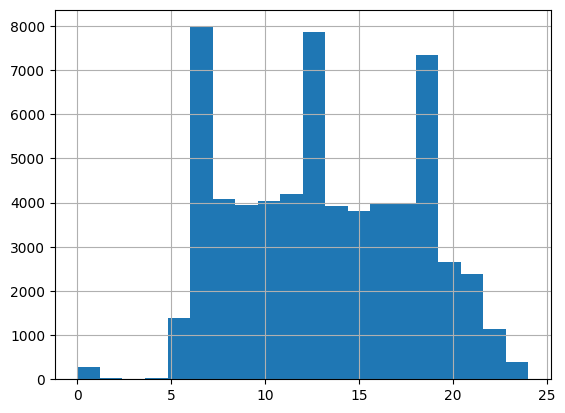

In [20]:
data['DepTime_Hour'].hist(bins=20)

<Axes: >

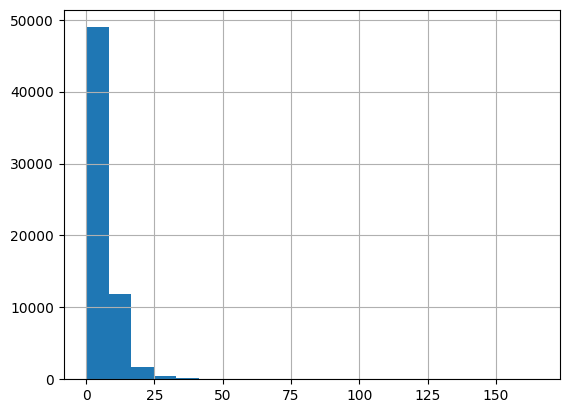

In [21]:
data['TaxiIn'].hist(bins=20)

<Axes: >

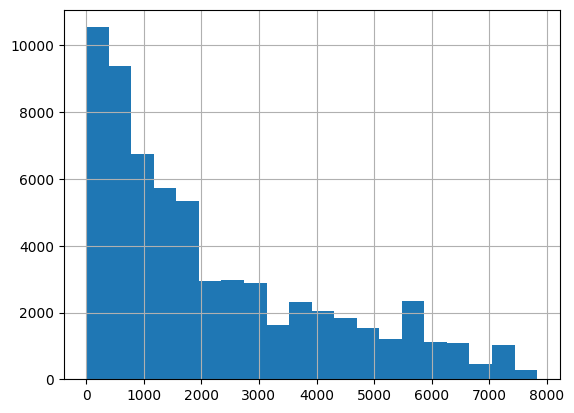

In [22]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

1. Разные масштабы переменных.
2. Проблемы с алгоритмами, чувствительными к масштабу.
3. Визуализация.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [23]:

def transform_data(data):
    transformed_data = data.copy()
    # Separate real and categorical features
    real_features = transformed_data.select_dtypes(include='number')
    categorical_features = transformed_data.select_dtypes(exclude='number')
    # Replace missing values
    real_features.fillna(0, inplace=True)
    categorical_features.fillna('nan', inplace=True)

    # Scale real features using StandardScaler
    scaler = StandardScaler()
    scaled_real_features = pd.DataFrame(scaler.fit_transform(real_features), columns=real_features.columns)

    # One-hot encode categorical features
    encoded_categorical_features = pd.get_dummies(categorical_features, dummy_na=True).reset_index(drop=True)

    # Concatenate scaled real features and encoded categorical features
    transformed_data = pd.concat([scaled_real_features, encoded_categorical_features], axis=1)

    return transformed_data


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [24]:
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded your dataset into a DataFrame called 'data'

# Call the transform_data function to transform the data
transformed_data = transform_data(data)

# Check the number of features (columns) in the transformed data
num_features_after_transformation = transformed_data.shape[1]

# Print the number of features
print(f"Number of features after transformation: {num_features_after_transformation}")


Number of features after transformation: 638


In [25]:
transformed_data

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,...,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,Dest_nan
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,0.144971,-0.744130,-0.786908,...,False,False,False,False,False,False,False,False,False,False
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.144971,0.183961,-0.582387,...,False,False,False,False,False,False,False,False,False,False
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.354394,0.471018,-0.582387,...,False,False,False,False,False,False,False,False,False,False
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.382136,-0.347886,-0.582387,...,False,False,False,False,False,False,False,False,False,False
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.437621,0.634799,-0.582387,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.437621,-0.120706,1.053782,...,False,False,False,False,False,False,False,False,False,False
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.604076,-0.217566,3.098994,...,False,False,False,False,False,False,False,False,False,False
63401,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,0.366910,-1.043514,-0.582387,...,False,False,False,False,False,False,False,False,False,False
63402,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,-0.132454,1.208912,2.689951,...,False,False,False,False,False,False,False,False,False,False


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [26]:
from sklearn.model_selection import train_test_split

# Check the number of samples in the dataset
print("Number of samples:", transformed_data.shape[0])

# Ensure there are no missing values or preprocess the data as needed

# Split the data into features (X) and the target variable (y)
X = transformed_data.drop(columns=['DepDelay']).copy()  # Assuming 'DepDelay' is your target variable
y = transformed_data['DepDelay'].copy()

# Check the number of samples in X and y
print("Number of samples in X:", X.shape[0])
print("Number of samples in y:", y.shape[0])

# Specify the test_size and random_state for a 70:30 split
test_size = 0.3  # 30% for testing, 70% for training
random_state = 47

# Check if test_size is valid
if test_size <= 0 or test_size >= 1:
    raise ValueError("test_size must be a fraction between 0 and 1")

# Check if random_state is a valid integer
if not isinstance(random_state, int):
    raise ValueError("random_state must be an integer")

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Check the number of samples in the training and testing sets
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in X_test:", X_test.shape[0])


Number of samples: 63404
Number of samples in X: 63404
Number of samples in y: 63404
Number of samples in X_train: 44382
Number of samples in X_test: 19022


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [27]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the entire dataset
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate MSE and R-squared on the entire dataset
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the results
print("MSE:", mse)
print("R-squared:", r2)


MSE: 0.867918084059407
R-squared: 0.13208191594059326


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [30]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.1, 1, 10]

best_alpha = None
best_mse = float('inf')

# Поиск наилучшего alpha
for alpha in alphas:
    model = Lasso(alpha=alpha)  # Используйте L1 регрессию (Lasso)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print(f"Best alpha: {best_alpha}")
print(f"Best MSE: {best_mse}")

# Используйте наилучший alpha для обучения окончательной модели
final_model = Lasso(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Оцените производительность окончательной модели на тестовом наборе
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
print(f"Final MSE on test data: {final_mse}")


Best alpha: 0.01
Best MSE: 0.9289678466755361
Final MSE on test data: 0.9289678466755361


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

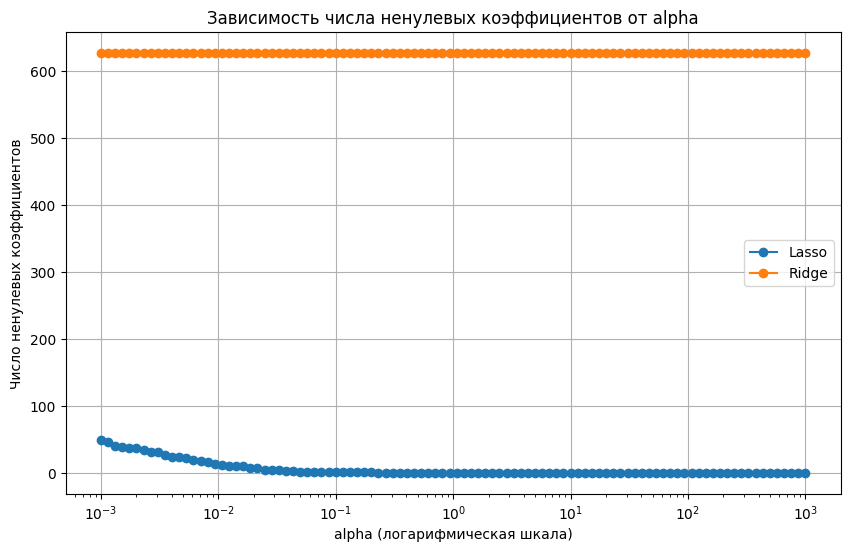

In [31]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

# Создайте список значений alpha в логарифмической шкале от 10^-3 до 10^3
alphas = np.logspace(-3, 3, 100)

# Создайте списки для хранения количества ненулевых коэффициентов для Lasso и Ridge
num_nonzero_coeffs_lasso = []
num_nonzero_coeffs_ridge = []

# Обучите L1 (Lasso) и L2 (Ridge) регрессии на разных значениях alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    num_nonzero_coeffs_lasso.append(np.sum(lasso.coef_ != 0))
    num_nonzero_coeffs_ridge.append(np.sum(ridge.coef_ != 0))

# Постройте график зависимости числа ненулевых коэффициентов от alpha
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, num_nonzero_coeffs_lasso, label='Lasso', marker='o')
plt.semilogx(alphas, num_nonzero_coeffs_ridge, label='Ridge', marker='o')
plt.title('Зависимость числа ненулевых коэффициентов от alpha')
plt.xlabel('alpha (логарифмическая шкала)')
plt.ylabel('Число ненулевых коэффициентов')
plt.legend()
plt.grid(True)
plt.show()


Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Обучите Ridge-регрессию (предполагается, что вы уже выбрали наилучший alpha)
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = ridge.predict(X_test)

# Вычисление RMSE (квадратный корень из среднеквадратичной ошибки)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Вычисление MAE (средняя абсолютная ошибка)
mae = mean_absolute_error(y_test, y_pred)

# Вычисление R-squared (коэффициент детерминации)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


RMSE: 0.97
MAE: 0.48
R-squared: 0.05


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [33]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

# Создайте список значений alpha на логарифмической сетке
alphas = np.logspace(-3, 3, 100)

# Инициализируйте объект RidgeCV с выбранными значениями alpha и 5 фолдами
ridge_cv = RidgeCV(alphas=alphas, cv=KFold(n_splits=5, shuffle=True, random_state=42))

# Обучение RidgeCV модели на обучающих данных
ridge_cv.fit(X_train[:1000], y_train[:1000])  # Используйте 1000 объектов для ускорения вычислений

# Оптимальное значение alpha, выбранное RidgeCV
best_alpha = ridge_cv.alpha_
print(f"Optimal alpha: {best_alpha}")

# Постройте график зависимости функции потерь от alpha
plt.figure(figsize=(12, 6))
plt.plot(np.log10(ridge_cv.alphas), np.mean(ridge_cv.mse_path_, axis=1), marker='o')
plt.xlabel('log(alpha)')
plt.ylabel('Средняя ошибка на кросс-валидации')
plt.title('Зависимость функции потерь от alpha (Ridge)')
plt.grid(True)
plt.show()

# Повторно обучите Ridge-регрессию с выбранным оптимальным alpha
final_ridge = Ridge(alpha=best_alpha)
final_ridge.fit(X_train, y_train)

# Вычислите метрики для финальной Ridge-модели
y_pred = final_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Optimal alpha: 1000.0


AttributeError: 'RidgeCV' object has no attribute 'mse_path_'

<Figure size 1200x600 with 0 Axes>

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

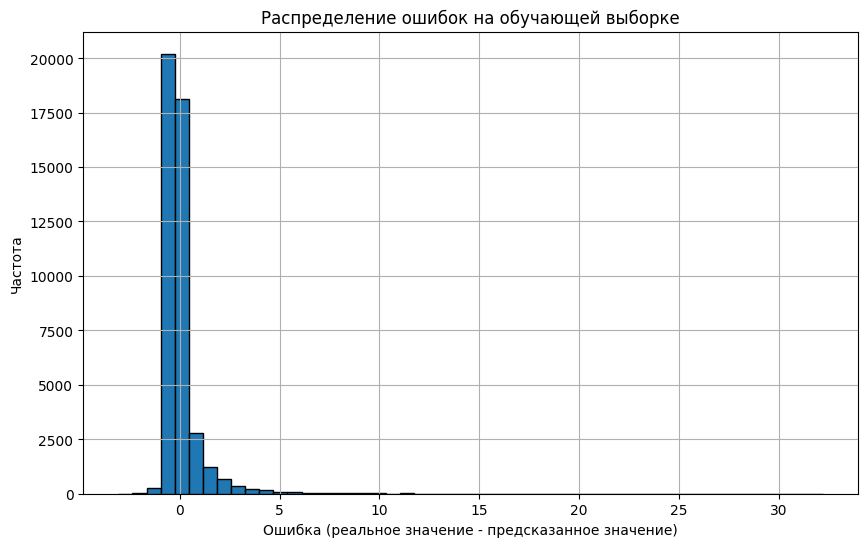

In [34]:
from sklearn.model_selection import cross_val_predict

# Используйте Ridge-регрессию (или другую модель, которую вы использовали)
model = Ridge(alpha=best_alpha)  # Используйте оптимальное значение alpha

# Получите OOF предсказания для обучающей выборки
oof_predictions = cross_val_predict(model, X_train, y_train, cv=5)

# Вычислите ошибки (разницу между фактическими и предсказанными значениями)
errors = y_train - oof_predictions

# Постройте гистограмму распределения ошибок
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k')
plt.xlabel('Ошибка (реальное значение - предсказанное значение)')
plt.ylabel('Частота')
plt.title('Распределение ошибок на обучающей выборке')
plt.grid(True)
plt.show()
